In [1]:
import random
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading data 
data = tfds.load('cifar10')
print(data)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /home/drjohnypham/tensorflow_datasets/cifar10/3.0.2.incomplete0HTF5X/cifar10-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /home/drjohnypham/tensorflow_datasets/cifar10/3.0.2.incomplete0HTF5X/cifar10-test.tfrecord*...:   0%…

Dataset cifar10 downloaded and prepared to /home/drjohnypham/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
{Split('train'): <PrefetchDataset shapes: {id: (), image: (32, 32, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>, Split('test'): <PrefetchDataset shapes: {id: (), image: (32, 32, 3), label: ()}, types: {id: tf.string, image: tf.uint8, label: tf.int64}>}


In [4]:
# The first element in the training set
for i in data["train"].take(1):
    print(i)

{'id': <tf.Tensor: shape=(), dtype=string, numpy=b'train_16399'>, 'image': <tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[143,  96,  70],
        [141,  96,  72],
        [135,  93,  72],
        ...,
        [ 96,  37,  19],
        [105,  42,  18],
        [104,  38,  20]],

       [[128,  98,  92],
        [146, 118, 112],
        [170, 145, 138],
        ...,
        [108,  45,  26],
        [112,  44,  24],
        [112,  41,  22]],

       [[ 93,  69,  75],
        [118,  96, 101],
        [179, 160, 162],
        ...,
        [128,  68,  47],
        [125,  61,  42],
        [122,  59,  39]],

       ...,

       [[187, 150, 123],
        [184, 148, 123],
        [179, 142, 121],
        ...,
        [198, 163, 132],
        [201, 166, 135],
        [207, 174, 143]],

       [[187, 150, 117],
        [181, 143, 115],
        [175, 136, 113],
        ...,
        [201, 164, 132],
        [205, 168, 135],
        [207, 171, 139]],

       [[195, 161, 126],
        [18

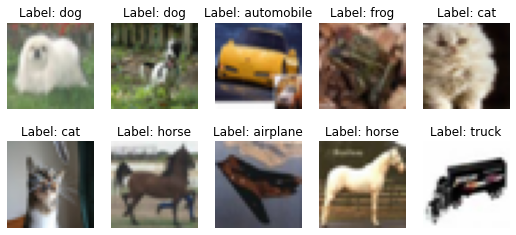

In [6]:
# Plotting the dataset
import matplotlib.pyplot as plt
%matplotlib inline

# Take 10 samples randomly to plot
sample_images, sample_labels = [],[]
for d in data["train"].shuffle(100, seed=4321).take(10):
    sample_images.append(d["image"].numpy())
    sample_labels.append(d["label"].numpy())

# Creating a label map mapping the integer label to the string
label_map = dict(zip(
    list(range(10)),
    ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]))

# Plotting the images
f, axes = plt.subplots(2, 5, figsize=(9,4))
for i, (img, lbl) in enumerate(zip(sample_images, sample_labels)):
    r, c = i//5, i%5
    axes[r,c].imshow(img,cmap='gray')
    axes[r,c].axis('off')
    axes[r,c].set_title("Label: {}".format(label_map[lbl]))

In [8]:
# Converting the images to data type float32 and labels to on-hot encoded vectors
def format_data(x,depth):
    return(tf.cast(x["image"],'float32'),tf.one_hot(x['label'],depth=depth))

In [9]:
# Creating a batched dataset 
tr_data = data["train"].map(lambda x: format_data(x,depth=10)).batch(32)

In [10]:
for d in tr_data.take(1):
    print(d)

(<tf.Tensor: shape=(32, 32, 32, 3), dtype=float32, numpy=
array([[[[143.,  96.,  70.],
         [141.,  96.,  72.],
         [135.,  93.,  72.],
         ...,
         [ 96.,  37.,  19.],
         [105.,  42.,  18.],
         [104.,  38.,  20.]],

        [[128.,  98.,  92.],
         [146., 118., 112.],
         [170., 145., 138.],
         ...,
         [108.,  45.,  26.],
         [112.,  44.,  24.],
         [112.,  41.,  22.]],

        [[ 93.,  69.,  75.],
         [118.,  96., 101.],
         [179., 160., 162.],
         ...,
         [128.,  68.,  47.],
         [125.,  61.,  42.],
         [122.,  59.,  39.]],

        ...,

        [[187., 150., 123.],
         [184., 148., 123.],
         [179., 142., 121.],
         ...,
         [198., 163., 132.],
         [201., 166., 135.],
         [207., 174., 143.]],

        [[187., 150., 117.],
         [181., 143., 115.],
         [175., 136., 113.],
         ...,
         [201., 164., 132.],
         [205., 168., 135.],
         

In [11]:
# Defining a model 
cnn = models.Sequential(
    [layers.Conv2D(filters=16,kernel_size=(3,3), strides=(2,2), activation='relu', padding='same', input_shape=(32,32,3)), # 32->16
     layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'), # 16->8
     layers.Conv2D(32, (3,3), activation='relu', padding='same'), # 8 -> 8
     layers.MaxPool2D(pool_size=(2,2), strides=(2,2), padding='same'), # 8->4
     layers.Flatten(),
     layers.Dense(64, activation='relu'),
     layers.Dense(32, activation='relu'),
     layers.Dense(10, activation='softmax')]
)

In [12]:
# Compiling the model
cnn.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["acc"])

In [13]:
# Training the model
history = cnn.fit(tr_data,epochs=25)

Epoch 1/25
1563/1563 [==============================] - 13s 8ms/step - loss: 2.2231 - acc: 0.2221
Epoch 2/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.6377 - acc: 0.3858
Epoch 3/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3857 - acc: 0.4899
Epoch 4/25
1563/1563 [==============================] - 10s 7ms/step - loss: 1.2691 - acc: 0.5424
Epoch 5/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1905 - acc: 0.5756
Epoch 6/25
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1239 - acc: 0.6013
Epoch 7/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0694 - acc: 0.6230
Epoch 8/25
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0315 - acc: 0.6373
Epoch 9/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9988 - acc: 0.6465
Epoch 10/25
1563/1563 [==============================] - 10s 6ms/step - loss: 0.9748 - acc: 0.6571
Epoch 11/25
1563/15